# Predicting the duration of a match in the Association of Tennis Professionals

Our project focused on a dataset with information about tennis players representing diverse countries. Our primary purpose is to develop a predictive model capable of forecasting the duration of tennis matches, measured in minutes.
By examining how factors such as player rankings, physical attributes, and age interplay with match duration, we aim to build a predictive framework that can forecast the time required for a tennis match to conclude. This predictive model has the potential to change how match durations are anticipated and managed totally, and help make wiser decisions in the realm of tennis analysis and strategy.

The dataset we use (Game results for Top 500 Players from 2017-2019, https://github.com/JeffSackmann/tennis_atp) records match results of top 500 players of the Association of Tennis Professionals (ATP). The data records diverse types of data from 2017 to 2019. This dataset covers crucial metrics such as the rankings of both winners and losers, their respective heights, and ages. So in this project, we will be estimating the match length by using the player's description components stats, we aim to identify patterns and trends that can predict future tournament outcomes. The hypothesis: the closer the physical attributes of the players are and the more similar the two opponents are, the longer the match will take. On the other hand, the greater the difference between them, the game will end sooner, since there is a greater imbalance.

# The Official Predictive Question:

- The predictive question that we will try to answer is a regression question and it will estimate the length match (minutes), and will use predictors such as winner's height (winner_ht), winner's age (winner_age), winner's rank (winner_rank), loser's height (loser_ht), loser's age (loser_age), and losers rank (loser_rank).
- This question will explore the relationship between the length of the match, and the age, height, and rank ranges. It will allow us to estimate the length of the match depending on the opponents' similarities/differences.

First, we will read the data using various libraries and functions; thus, we need to lead the necessary libraries.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(dplyr)
library(rsample)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Now, we will read the tennis_players.csv dataset. We will use functions like "read_csv" to read the data set, since it is a CSV file.

In [4]:
# Read the dataset from CSV into R
tennis_players <- read_csv("data/tennis_players.csv")

tennis_players

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
6,2019-M020,Brisbane,Hard,32,A,20181231,294,105453,2,⋯,53,37,13,12,6,9,9,3590,19,1835
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715


Here we will select the data to extract the columns that we need specifically: winner's height (winner_ht), winner's age (winner_age), winner's rank (winner_rank), loser's height (loser_ht), loser's age (loser_age), and losers rank (loser_rank), length of the match (minutes)

In [14]:
# Select the predictive variable and our predictors

opponent_stats <- tennis_players |>
    select(winner_ht, winner_age, winner_rank, loser_ht, loser_age, loser_rank, minutes) |>
    arrange(winner_rank)

opponent_stats
  

winner_ht,winner_age,winner_rank,loser_ht,loser_age,loser_rank,minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
188,31.61123,1,185,26.85284,21,116
188,31.61123,1,NA,26.89391,36,120
188,31.61123,1,172,26.61465,47,55
188,31.64956,1,NA,25.00479,230,123
188,31.64956,1,188,33.74401,177,124
188,31.64956,1,NA,19.75086,27,142
188,31.64956,1,NA,22.92402,19,195
188,31.64956,1,178,29.04312,9,52
188,31.64956,1,185,24.88980,31,83


So from the above steps, we got seven variables, all of which are numerical variables (dbl variables). We will use one of them (minutes) as the predictive variable, and the rest are the predictors. 

So we are trying to predict the length of the tennis match based on the opponents' characteristics. We aim to use these to train a predictive model.

So we split the data into two sets:
# Training Set:
- It is used to train the predictive model. It contains a subset of data with known outcomes, and we will use the training set to learn some patterns between input and predictive variables.
- It also helps us to minimize the prediction error, as it will help us create an accurate model.
- It will help us find the optimal k value to help us ensure that we are not overfitting or underfitting our data.

# Testing Set:
- This set is used to evaluate the performance of the trained model. It consists of the data that has not been classified into the training set.
- It helps us to assess the performance of the model.
- By comparing the prediction with the testing set and the actual outcome we can measure its accuracy, precision and recall.

This approach helps us to evaluate the performance of the model.

In [9]:
# Split the dataset into training and testing sets
set.seed(123) # for reproducibility

opponent_split <- initial_split(opponent_stats, prop = 0.75, strata = minutes)
opponent_train <- training(opponent_split)
opponent_test <- testing(opponent_split)

opponent_train


winner_ht,winner_age,winner_rank,loser_ht,loser_age,loser_rank,minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
178,29.00479,9,188,31.88227,40,66
178,29.00479,9,180,26.37098,63,79
NA,19.86858,31,NA,19.40589,147,60
NA,19.33470,131,188,31.63039,56,61
196,28.01095,18,181,29.45380,67,47
NA,26.25051,20,180,28.50376,48,73
185,26.85284,21,NA,21.19644,68,61
183,30.71321,24,188,35.57563,105,70
188,31.61123,1,172,26.61465,47,55


NULL

NULL

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


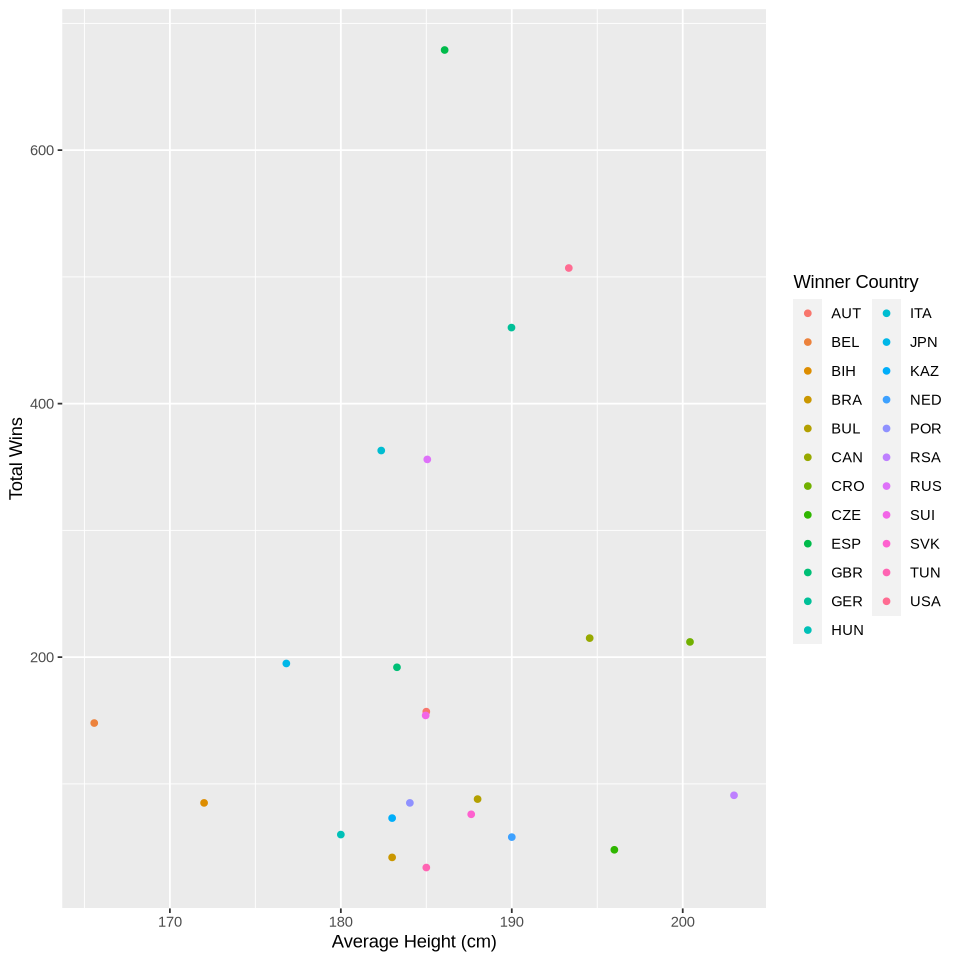

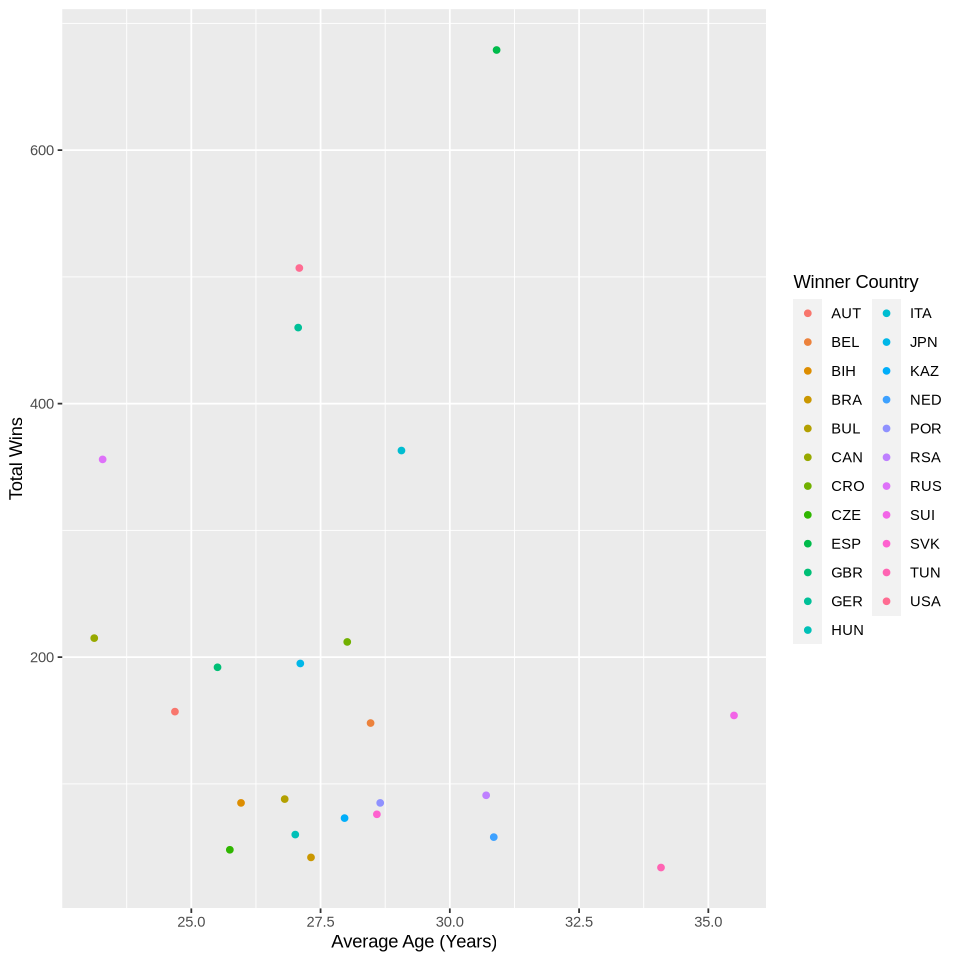

In [45]:
options(repr.plot.width = 8, repr.plot.height = 8)

plot_height_countries<-data_train|>
ggplot(aes(x = avg_height, y=total_wins, color=winner_country)) +
    geom_point() +
    labs(x = "Average Height (cm)", y="Total Wins", color = "Winner Country")
    ggtitle("Country vs Total Wins in a Tournament") +
    theme_minimal() 

plot_age_countries<-data_train|>
ggplot(aes(x = avg_age, y=total_wins, color=winner_country)) +
    geom_point() +
    labs(x = "Average Age (Years)", y="Total Wins", color = "Winner Country")
    ggtitle("Country vs Total Wins in a Tournament") +
    theme_minimal() 
ggsave("plot_height_countries.png")
ggsave("plot_age_countries.png")

plot_height_countries
plot_age_countries

In [29]:
lm_spec<-linear_reg()|>
set_engine("lm")|>
set_mode("regression")
lm_recipe<-recipe(minutes~winner_age+winner_ht+loser_age+loser_ht+winner_rank+loser_rank, data=opponent_train)


In [33]:
lm_fit<- workflow()|>
add_recipe(lm_recipe)|>
add_model(lm_spec)|>
fit(data=opponent_train)


lm_train_data <- lm_fit|>
predict(opponent_train)|>
bind_cols(opponent_train)|>
metrics(truth=minutes, estimate=.pred)
# filter(.metric=="rmse")|>
# select(.estimate)|>
# pull()
lm_train_data 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,42.196481627
rsq,standard,0.008782166
mae,standard,32.776066032


In [31]:
lm_test_data <- lm_fit|>
predict(opponent_test)|>
bind_cols(opponent_test)|>
metrics(truth=minutes, estimate=.pred)
lm_test_data

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.150135e+01
rsq,standard,6.292111e-04
mae,standard,3.243741e+01


In [34]:
coefficient <- lm_fit|>
extract_fit_parsnip()|>
tidy()
coefficient

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),68.787204986,30.72052427,2.2391286,0.025248374
winner_age,0.071050619,0.25756800,0.2758519,0.782688059
winner_ht,-0.039077060,0.10779110,-0.3625258,0.716994377
loser_age,-0.383416297,0.27376260,-1.4005430,0.161493549
loser_ht,0.331899750,0.11808069,2.8107877,0.004986340
winner_rank,-0.008295208,0.01857277,-0.4466327,0.655184762
loser_rank,-0.032256754,0.01178312,-2.7375390,0.006240518


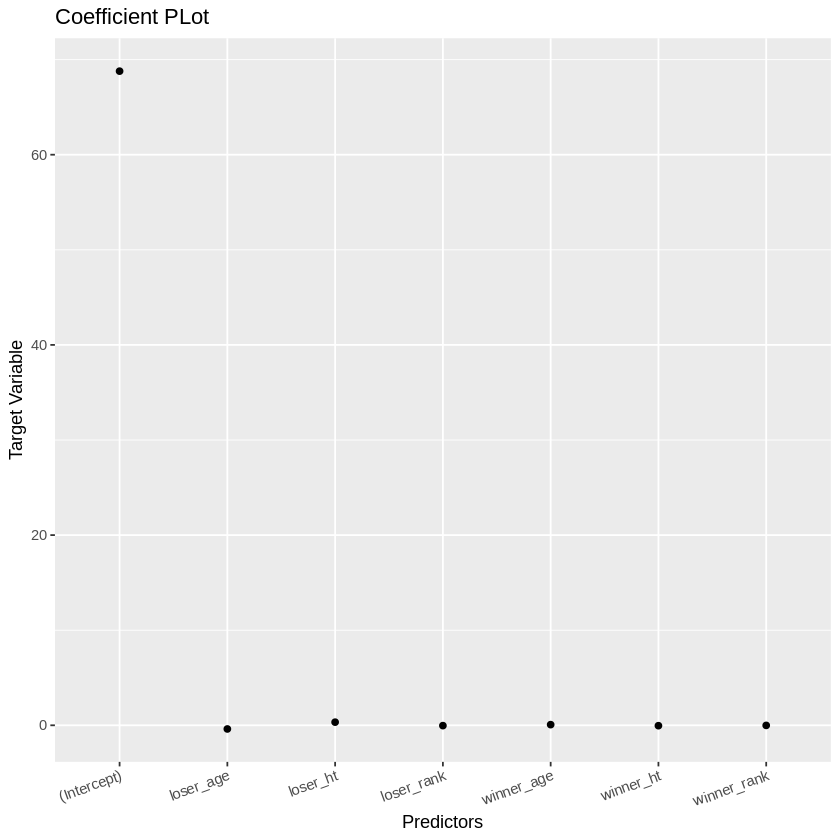

In [35]:
plot<- coefficient|>
ggplot(aes(x=term, y=estimate))+
geom_point()+
labs(title="Coefficient PLot",
     x="Predictors",
     y="Target Variable")+
theme(axis.text.x = element_text(angle=20, hjust=1))
plot

# Methods:
- For data analysis we used variblse such as winner_age, winner_height, and winner_country. These are relevant as they provide information about the characteristics of tennis players and the countries they represent.
- We also considered total_wins variable, which represents the number of wins for each country, as a target variable for prediction.
  

To visualize the results, we created scatter plots to explore the relationship between  winner_height and total_wins, as well as winner_country as a colour-base. This helped identify any patterns or trends in the data.

# Expected outcomes:
- We expect that the taller the player is, the more probable they are to win the tournament.
- Also, the closer the age is to 27, the more probable it is for them to win the tournament.
- Therefore, the countries with the most players that balance those two conditions will be more likely to win.
- Also, countries with more wins will have a higher representation in the dataset, i.e. more total wins.

# Significance:
- The impact of this finding is to create the right advertising in different countries to gather interest. If a player from a certain country (ex. England) is predicted to win, we can advertise to England and entice them, which can bring in more funding for tennis and make advertising more strategic.

# Future Questions:
- Can we use this model to guess the actual winner from that specific country?
- Can we adjust this model to be a regression model to predict the number of viewers of the tennis tournaments from different countries, and would that be cohesive with the findings of this current model? 
- Generally, can we use this model to guess more information regarding the tournament?to?